In [2]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In texts influenced by those who fear runaway AGI  and/or Ray Kurzweil, we often read about the amazing consequences of exponential growth, recursive growth etc. when it comes to the intelligence explosion. 

In *part I* of this post I would like to explore what happens when you apply the same math to *problem* complexity, and make an argument on why human level AI *might not be able* to recursively enhance in the way those who fear runaway AGI  often sketch.

In *part II* I will try to give some consequences on this, but I'm not really happy with it. I'll share it anyway, and iterate through it as feedback comes in.

# Important concepts and caveats in this article

## Concepts

* Big-$\mathcal{O}$ complexity
* consequences of exponential growth and [Amdahls law](https://en.wikipedia.org/wiki/Amdahl%27s_law)
* the value and cost of heuristics

## Caveats

* **heavy** Fermi estimation of numbers (i.e., eye balling with some post-hoc reasoning) and simplifying assumptions (but mostly to the cost of my argument, not to its benefit, i.e. conservative assumptions)

## TL;DR on the top 

I present one of my arguments why I think AGI risk is a red herring for smart people wanting to save the world.
Big-$\mathcal{O}$ eats exponential computing power growth for lunch, so even assuming it will magically continue till the theoretical limit, an AGI might not be the superintelligence god it is sometimes sketched to be. At the very least, I think this warrants a very skeptical approach to the very idea of superintelligence. 

# Optimistic and naive Modeling of intelligence

My assumptions/simplifications:

1. Every spike in the brain or cps does an equivalent of a FLOP in each connected neuron/each computer system
2. If we take recent estimates in the brain, we have around 21-26 billion neurons in the cerebral cortex, and 101 billion in the cerebellum [see](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2776484/), with 1.5e14 (150 trillion) synapses  [in the neocortex alone](https://psychology.stackexchange.com/questions/7967/how-many-synapses-in-the-average-human-brain) and firing 0.1-2 times per second [see](https://aiimpacts.org/rate-of-neuron-firing/).
3. Kurzweils estimate for the brain [cited here](https://waitbutwhy.com/2015/01/artificial-intelligence-revolution-1.html) is around 1e16 cps which are a bit different from FLOPS, and it also cites the super computer with 34 quadrillion cps. 


So let's say between current intelligences are around 1.5e13 and 3.4e16. 

# The TSP (traveling salesman problem)

How far does this get us in one of the most famous NP-hard problems, the traveling salesman problem? (assuming 1 FLOP is what we need to solve a problem of size 1...constant factors vanish under O notation, and we will get back to this):

Complexities for TSP range from $O(n!)$ (exact naive solution), over $O(n^22^n)$(held-karp algorithm for exact solution) to $O(n^3)$(Christofides algorithm),$O(n^2log_2n)$ (greedy search), to $O(n^2)$ (insertion heuristic). [1](https://web.tuke.sk/fei-cit/butka/hop/htsp.pdf) [2](https://en.wikipedia.org/wiki/Travelling_salesman_problem#Exact_algorithms).
Let's see how many data processing events could happen there depending on different assumptions, already assuming that *the cerebellum does nothing at all* for intelligence,i.e. all embodied computing theories are false:

In [3]:
cortex_neurons_min,cortex_neurons_max=21e9,26e9
cortex_synapses = 1.5e14

connectivity_min,connectivity_max=cortex_synapses/cortex_neurons_min,cortex_synapses/cortex_neurons_max

spike_rate_min=0.1
spike_rate_max= 2

In [4]:
flop_opt_min=cortex_neurons_min*spike_rate_min*connectivity_min
print("Optimistic estimate for the FLOPS of the brain is :{:.2}".format(flop_opt_min))

Optimistic estimate for the FLOPS of the brain is :1.5e+13


In [14]:
from scipy.special import factorial
def naive(n):
    return factorial(n)
naive=np.vectorize(naive)
def held_karp(n):
    return n**2*2**n
held_karp=np.vectorize(held_karp)
def greedy(n):
    return n**2*np.log2(n)
greedy=np.vectorize(greedy)
def christofides(n):
    return n**3
christofides=np.vectorize(christofides)
def insertion_heuristic(n):
    return n**2
insertion_heuristic=np.vectorize(insertion_heuristic)

In [15]:
n=np.arange(2,1e3,1) # going from 1 to a thousand cities
c_naive=naive(n)
c_hk=held_karp(n)
c_christ=christofides(n)
c_greedy=greedy(n)
c_ins=insertion_heuristic(n)

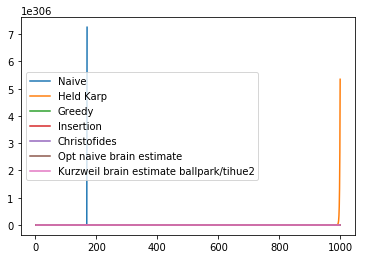

In [16]:
plt.plot(n,c_naive,label="Naive")
plt.plot(n,c_hk,label="Held Karp")
plt.plot(n,c_greedy,label="Greedy")
plt.plot(n,c_ins,label="Insertion")
plt.plot(n,c_christ,label="Christofides")
plt.plot(n,np.ones_like(n)*1.5e13,label="Opt naive brain estimate")
plt.plot(n,np.ones_like(n)*3.4e16,label="Kurzweil brain estimate ballpark/tihue2")
plt.legend()

Okay, the plot doesn't show a lot. Normally you would use log-scale, but the scales involved actually *break plt.loglog*...so yeah.

What we can see is that the naive algorithm exploded very early, the held-karp algorithm at iteration 1000 and the rest is just mushed together at ~0**e306**. We can at least see the watershed between exact and approximate solutions.

So let's look at the exact part

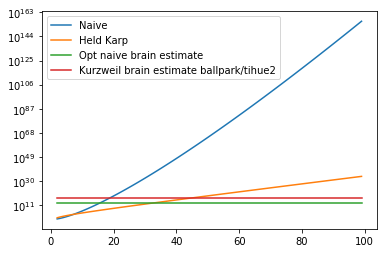

In [17]:
n=np.arange(2,1e2,1) # going from 1 to 10 million cities
c_naive=naive(n)
c_hk=held_karp(n)
plt.plot(n,c_naive,label="Naive")
plt.plot(n[:len(c_hk)],c_hk,label="Held Karp")
plt.plot(n,np.ones_like(n)*1.5e13,label="Opt naive brain estimate")
plt.plot(n,np.ones_like(n)*3.4e16,label="Kurzweil brain estimate ballpark/tihue2")
plt.yscale("log")
plt.legend()

So, in this very limited region, log scale works again and we can actually see something. Mainly that superpolynomial and factorial growth kills any gains in computation pretty quickly. The Kurzweil estimate is double of ours (a bit more even), but it only shifts us from ~37 to ~43 cities. Can the approximate solutions do better?

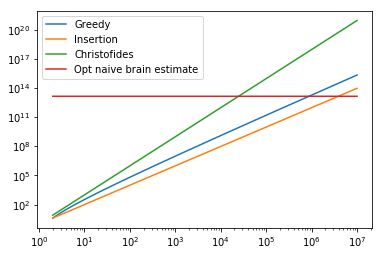

In [18]:
n=np.arange(2,1e7,1) # going from 1 to 10 million cities
#c_naive=naive(n)
#c_hk=held_karp(n)
c_christ=christofides(n)
c_greedy=greedy(n)
c_ins=insertion_heuristic(n)

plt.plot(n,c_greedy,label="Greedy")
plt.plot(n,c_ins,label="Insertion")
plt.plot(n,c_christ,label="Christofides")
plt.plot(n,np.ones_like(n)*1.5e13,label="Opt naive brain estimate")
plt.yscale("log")
plt.xscale("log")
plt.legend()

Why *yes they CAN*! A lot better even. (In the future, you might find a link to a post here where I show *how much better* we can do if we try to solve things approximately, i.e. [satisfice](https://en.wikipedia.org/wiki/Satisficing) instead of solving things perfectly )  

As we can see, in our simplified version, a hypothetical super intelligence which expends one of the "FLOPS" which we loosely defined the brain has 1.5e13 of for a time step could solve a problem with up to 10 million cities in under a second. Which is pretty good actually. The trade-off? The solution is no longer the guaranteed optimum, though probably pretty close. So by becoming "more intelligent" in the sense of being able to handle more cities, the intelligence has also become *fallible*. In this case, because the algorithm is very specific, it is possible to bound the error, but this might not always be possible. And this brings me to my conjecture: 

# It might be possible that human level *general* intelligence can only be achieved by *general mediocrity*
I.e.,a variant of the [no free lunch](https://en.wikipedia.org/wiki/No_free_lunch_theorem) theorem shows up again and we can have either

* generality
* tight bounds on errors
* speed

but not all at the same time

---

# Part II: Emotions, Conclusions and Fears

*This is the part I struggled with writing fairly and without any accidental ad hominems, because this is where my aversion to prophets and futurism comes into place. Please don't hesitate to call me out if you think I am not making arguments in good faith or being unfair to people.*

# TL;DR on the top:

* I write many words on how it's fine to do AGI risk research if you find it cool, but please don't argue for it with wild assumptions
* I think AGI is either not as urgent as other topics (possibly not urgent at all), or it's already here and we need to broaden our view
* I feel like the current arguments for AGI risk are handwavy, which is bad for everyone including AGI risk activists
* I have a really hard time phrasing my criticism in a non-preachy way, which I don't like


So what do I want to say with this? Am I anti AGI risk research?
NO. More research > less research. Always.
But, in a sense, the main thing that is bothering me is that

# Someone is "wrong" on the internet

In my opinion some arguments that are used when talking about superintelligence now are, in the worst case, actively harmful to the stated goals they are trying to achieve (tackling the most important potential risks of the future).

At best, they are intellectually dissatisfying. They make wild assumptions and simplifications without (in my eyes) sufficient justification, creating a (in my opinion) artificial climate of urgency based pseudo quantitative arguments. As an example, take this quote from Wikipedia referencing Bostrom

>Just as the fate of the mountain gorilla depends on human goodwill, so might the fate of humanity depend on the actions of a future machine superintelligence.

or [this article](https://www.skeptic.com/reading_room/why-we-should-be-concerned-about-artificial-superintelligence/) also linked on wikipedia, which states:

>Our intelligence is ultimately a mechanistic process that happens in the brain, but there is no reason to assume that human intelligence is the only possible form of intelligence. And while the brain is complex, this is partly an artifact of the blind, incremental progress that shaped it - natural selection. This suggests that developing machine intelligence may turn out to be a simpler task than reverse- engineering the entire brain. The brain sets an upper bound on the difficulty of building machine intelligence; work to date in the field of artificial intelligence sets a lower bound; and within that range, it’s highly uncertain exactly how difficult the problem is. We could be 15 years away from the conceptual breakthroughs required, or 50 years away, or more. 

So the fact that the brain is an upper bound on the complexity of *human intelligence* is used to justify the belief it might also place an upper bound on *superhuman intelligence*. The complexity of the brain which might be necessary for even our limited general intelligence is handwaved as evolution.

Arguments like this hype up our imagination (which is good) with unrealistically optimistic, extrapolating and reductionist science-ish stories (which is bad).If you read *Superintelligence*, or any of a large subset of MIRI, FRI etc. publications, there is usually (at best) an handwavy presumption that

* generality and superhuman performance are orthogonal
* recursive self modification is more or less trivially possible
* humans will not stand a chance once the "takeoff" is complete (or even started in the case of "hard takeoff")
* the concept "negative black swans" (i.e., catastrophic downside of rare events) is used to handwave the low probability of a superintelligence by basically creating AI satan

If you keep hammering those points, which are (in my eyes) not really based in anything substantial, a superintelligence becomes somewhat plausible. 

## Potentially "x-risk" consequences

This leads to [80k hours rating AI risk higher than climate change and the ...*less consumer friendly* sides capitalism!](https://80000hours.org/articles/cause-selection/),even though 

* climate change is very much already here
* the argument that "we don't know how bad it could get" also applies to climate change, as [it seems more and more likely we have  been underestimating urgency, damage and extent](https://insideclimatenews.org/news/26122017/climate-change-science-2017-year-review-evidence-impact-faster-more-extreme)
* Another aspect that the "runaway AGI will be BAD" arguments misses, best summarized by xkcd in [this comic](https://www.xkcd.com/1968/): existing injustice, oppression and disparities can become much more entrenched once the police force no longer has plebeian families and friends

And if you think I am being melodramatic here, might I remind you of [Chinas social score](https://www.independent.co.uk/life-style/gadgets-and-tech/china-social-credit-system-punishments-rewards-explained-a8297486.html), the governments [predator drones](https://en.wikipedia.org/wiki/UAVs_in_the_U.S._military) or present this example of a [robot being used to drive away homeless](https://www.theguardian.com/us-news/2017/dec/16/san-francisco-homeless-robot) today even?

I have an aversion against focusing too much on x-risks for reasons which I will explain in another post. However to me the *overwhelming* risk of things that are already happening by default outweighs the risk for what *might* happen with a (probably tiny) unknown probability. The framework of

* how likely is a problem
* how neglected is it
* what difference will it make if I try to work on it (i.e. "expected return")

is quite popular in the EA/rationalist/cause prioritization crowd  (which happens to also have a higher than average number of people interested in AGI risk). In the case of AGI, I think the silent presumption of AGI power and impact leads to twisted reasoning, as in the case of[the open philanthropy foundation](https://www.openphilanthropy.org/research/cause-reports/anthropogenic-climate-change) as well as [the giving what we can foundation ](https://www.givingwhatwecan.org/research/other-causes/climate-change/) and [80khours](https://80000hours.org/problem-profiles/climate-change/). They all use this framework to classify political lobbying, technical innovation and direct carbon reduction as a worthwhile goal with uncertain return. This is motivated amongst other things because "a lot" of people are already working on it, political breakthroughs seem to have low probability and any additional activism might have diminishing returns. Fair enough.

But AGI is [deemed as receveing](https://www.openphilanthropy.org/research/cause-reports/ai-risk)  little attention from researchers in relation to the risk,with 80k hours [giving a neglectedness of 14 vs climate changes 2](https://80000hours.org/problem-profiles/climate-change/) and an AGI "scale" of 15 vs climate changes 14!

Given the point made about underestimating climate change, that we are far away from a stable global commitment of working against climate change this is preposterous to me. 

Relative to proven risk, not that much effort gets spent on climate change vs AGI. And the argument of small probability-high impact works for political solutions for climate change just as well as for AGI.

For organisations like 80k hours which have significant influence about peoples decisions purporting to attempt rational and evidence based guidance, not taking a conservative position and at least ranking climate change higher than AGI *until we know more* seems a bit irresponsible. It is a bit like advising people to buy lottery tickets when they ask you how to invest.

And in fact, you can argue it is  irresponsible no matter what bias you bring (alarmism vs. skepticism) because if one believes that AGI will actually become a problem, acting like it could happen *really soon* each year without any evidence will backfire after a while. Unless the worst case scenario (for AGI risk pessimists) happens and we have an unexpected runaway AI incident in the next decade or so, people will move on.The next hype cycle will start and we will have to re-fight the battle for public interest, not unlike climate change had to do even with overwhelming evidence. So let's be better about the relative urgency and the impact that things will have.

## Another angle on this/how to convert me

Alternatively, if we really want to focus on the black swans, then I think we should not separate between technological AGI and what I have started to call "corporate intelligence". The basic idea was touched in [Meditations on Moloch](http://slatestarcodex.com/2014/07/30/meditations-on-moloch/), but taken much further in the 34C3 keynote ["dude, you broke the future"](http://www.antipope.org/charlie/blog-static/2018/01/dude-you-broke-the-future.html). The basic idea is that one should treat capitalism/governance as an *existing* AGI, mainly a distributed reinforcement learning algorithm currently optimising for "cash" or "growth" as a proxy for human welfare. 

I will write another blogpost on this to elaborate, but if and when I see this idea taken seriously as an incarnation of superintelligence I will immediately seize my criticism. Because this stuff *exists*, and doesn't need any handwaving and extrapolating from past progress.



## My more irrational fears

This part is purely emotional, so please, if I'm wrong, reassure me. I want to be wrong on this.

If someone still wants to do research on AGI, cool, as long as the funds arguments that lead them to it are either personal or the arguments are intellectually honest and rigorous, cool<sup>(heck, I am working on AI instead of doing direct action against climate change. But I also don't purport to dedicate my existence to making sure efforts are directed 100% efficiently)</sup>.I believe AI and the way it will influence our society *is cool*, and it *is important*. 

But I also think AGI right now  is kind of a red herring, a shiny project smart people can solve amongst themselves by being smart instead of having to deal with activism. The artificially inflated risk of AGI, the bias to the perfect AI overlord distorts the discourse, gives justification to pursuing our interests (which we shouldn't need) and distracts from other, also <sup>maybe slightly less</sup> cool and important issues:

* age old questions about governance and resource allocations (democracy as we know it is less than 200 years old. the idea that humans should not be left to die if they don't have wealth or labour capacity only gained politically impactful steam around 150 years ago )
* partially as a consequence of the above, climate change destroying the planet (this is happening. the scientific consensus has been reached for decades, and you can feel the effects all around the world. to challenge this is the same as to challenge gravity: I welcome your fucking amazing, humongous, completely clear data)
* as a response to the devastation from the above, the ruthless part of our elite use surveillance (soft AI) and robots (hard AI) to suppress citizens of this earth

*That's* the threats I see. So instead of acting like AGI is on the horizon risk, let's start the research *knowing* that we might never need it, just because it is interesting. Let's stop using the "runaway AI might be closer than you think and will be devastating" argument for fund raising though and leave the doomsday money to stuff which might actually kill us in the next 50 years. And let's start including ANI risk in every text we write to raise awareness about AI risk, so we avoid THAT dystopia.

# Thanks for reading

For comments, corrections or angry counter rants, please *do* reach out via [email](mailto:contact@krawczuk.eu) or [mastodon](https://mastodon.host/@ik).

# An attempt at [Steel manning](https://wiki.lesswrong.com/wiki/Steel_man): Holes in this article and (some) counters:


* Moores law: Moores law is done for now when it comes to single core compute(even if [Intel wants you to think othrwise](https://newsroom.intel.com/editorials/moores-law-setting-the-record-straight/), they have [stopped increasing the CPU frequency years ago](https://software.intel.com/en-us/blogs/2014/02/19/why-has-cpu-frequency-ceased-to-grow)).[Aside from Landauer's principle](https://en.wikipedia.org/wiki/Landauer%27s_principle) and the failure to further increase single core performance, most compute is memory bound by now, and most Moore law advocates are by now using the "compute per dollar" or "compute per Watt" version, or in Science Fiction "compute per area/gram". But for that you need to adapt your algorithms to *benefit* from parallelization. Which brings us to the next point
* Parallelization: [OpenAI just released a paper on the amount of compute used in AI research](http://archive.today/IOPrA), and so far we seem to be making good progress in getting exponentially more compute into our AI. The OpenAI researchers are confident that will continue, and they actually did proper research on it so I will defer to them until I have done more research. As of today  I remain skeptical though:
  1. Exponential progress so far means that anything less will encounter huge diminishing returns. If you look at [this paper looking at imagenet performance](https://arxiv.org/abs/1409.0575), the scores improved linearly with time, while compute grew (according to OpenAI) exponentially
  2. Compute/Watt has a theorised upper limit of around $6e19$ FLOPS/Watt, the aforementioned [Landauer's principle](https://en.wikipedia.org/wiki/Landauer%27s_principle).  Currently according to [this Wikipedia entry](https://en.wikipedia.org/wiki/Performance_per_watt#FLOPS_per_watt) we are at $7.5e10$ FLOPS/Watt in 2016, going up from $1.6e9$ in 2010 which would mean around a whopping 60% increase per year. If how long until we hit the theoretical bound at this speed? 

In [19]:
#7.5e10*(1.6)**x =6e19
#(1.6)**x =6e19/7.5e10
x=np.log(6e19/7.5e10)/np.log(1.6)
x

43.61694465749319

Huh. ~45 years. Better hope we get to make efficient use of all that compute then. At least I'll have a job until retirement age if I manage to contribute to making this possible :-)

# Steel manning continued
* But AGI will be able to seamlessly interface with all of those ANI tools at the speed of light!
  * will it though? You are assuming:
    * The algorithm of  general intelligence is able to run at fast speeds (either parallelization and/or the sequential parts can run on the currently feasible cores at "the speed of light"
    * The time steps required for consciousness to emerge are small enough that it's possible to think that fast. I recommend the book "Spectrum" by Sergey Lukianenko which features a race of aliens which *literally is computers*, and thus perceives the world quite differently. They can interface with PCs no problem, but are completely overloaded by the physical world unless scaled down
* please send further counter arguments at [contact@krawczuk.eu](mailto:contact@krawczuk.eu)